In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_output.csv")
df

,encounter_id,dialogue,clean_dialogue
0,[doctor],"hi, martha . how are you ?","hi, martha . how are you ?"
1,[patient],i'm um doing okay . how are you ?,i am doing okay . how are you ?
2,[patient],okay .,okay .
3,[doctor],martha is a 50-year-old female with a past med...,martha is a 50-year-old female with a past med...
4,[patient],i'm doing well . i've been traveling a lot rec...,i am doing . i have been traveling a lot rece...
5,[doctor],nice . that's great . i'm glad to hear that yo...,nice . that's great . i am glad to hear that y...
6,[patient],"yes , fall foliage is the best .","yes , fall foliage is the best ."


In [2]:
from utterance_encoder import sbert_encoder
from similarity_calc import cossim_score

In [3]:
sentences = df["clean_dialogue"]

In [4]:
sentences

0                           hi, martha . how are you ?
1                     i am  doing okay . how are you ?
2                                               okay .
3    martha is a 50-year-old female with a past med...
4    i am doing  . i have been traveling a lot rece...
5    nice . that's great . i am glad to hear that y...
6                     yes , fall foliage is the best .
Name: clean_dialogue, dtype: object

In [5]:
s = sbert_encoder(list(sentences))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
s

tensor([[ 0.0007,  0.0050,  0.0463,  ..., -0.0058, -0.0588, -0.0091],
        [ 0.0408, -0.0213,  0.0880,  ..., -0.0218, -0.0477, -0.0120],
        [-0.0672, -0.0489, -0.0638,  ...,  0.0107,  0.0630,  0.0226],
        ...,
        [ 0.0685, -0.0107,  0.0607,  ..., -0.0976, -0.1115, -0.0232],
        [ 0.0327, -0.0562,  0.1385,  ..., -0.0290, -0.1636,  0.0963],
        [ 0.0322,  0.0175,  0.0756,  ..., -0.0974,  0.0419,  0.1103]])

In [7]:
cossim_score(s)

array([[1.        , 0.94515902, 0.89860529, 0.95689517, 0.89430153,
        0.91770887, 0.8966971 ],
       [0.94515902, 1.        , 0.9009409 , 0.9427653 , 0.90541208,
        0.92497379, 0.88371265],
       [0.89860529, 0.9009409 , 1.        , 0.91291785, 0.88942462,
        0.90269595, 0.90037781],
       [0.95689517, 0.9427653 , 0.91291785, 1.        , 0.92331362,
        0.94234502, 0.91880065],
       [0.89430153, 0.90541208, 0.88942462, 0.92331362, 1.        ,
        0.93734878, 0.92208415],
       [0.91770887, 0.92497379, 0.90269595, 0.94234502, 0.93734878,
        1.        , 0.9405902 ],
       [0.8966971 , 0.88371265, 0.90037781, 0.91880065, 0.92208415,
        0.9405902 , 1.        ]])

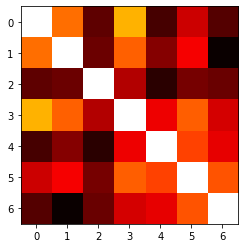

In [8]:
plt.imshow(cossim_score(s), cmap='hot', interpolation='nearest')